In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
dataset = pd.read_csv('players_20.csv', header = 0)

In [3]:
dataset.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
interesting_columns = [
    'short_name', 
    'age', 
    'player_url', 
    'nationality', 
    'overall', 
    'potential', 
    'club', 
    'value_eur', 
    'wage_eur', 
    'player_positions'
]
dataset = pd.DataFrame(dataset, columns=interesting_columns)

In [5]:
dataset.head()

,short_name,age,player_url,nationality,overall,potential,club,value_eur,wage_eur,player_positions
0,L. Messi,32,https://sofifa.com/player/158023/lionel-messi/...,Argentina,94,94,FC Barcelona,95500000,565000,"RW, CF, ST"
1,Cristiano Ronaldo,34,https://sofifa.com/player/20801/c-ronaldo-dos-...,Portugal,93,93,Juventus,58500000,405000,"ST, LW"
2,Neymar Jr,27,https://sofifa.com/player/190871/neymar-da-sil...,Brazil,92,92,Paris Saint-Germain,105500000,290000,"LW, CAM"
3,J. Oblak,26,https://sofifa.com/player/200389/jan-oblak/20/...,Slovenia,91,93,Atlético Madrid,77500000,125000,GK
4,E. Hazard,28,https://sofifa.com/player/183277/eden-hazard/2...,Belgium,91,91,Real Madrid,90000000,470000,"LW, CF"


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   short_name        18278 non-null  object
 1   age               18278 non-null  int64 
 2   player_url        18278 non-null  object
 3   nationality       18278 non-null  object
 4   overall           18278 non-null  int64 
 5   potential         18278 non-null  int64 
 6   club              18278 non-null  object
 7   value_eur         18278 non-null  int64 
 8   wage_eur          18278 non-null  int64 
 9   player_positions  18278 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.4+ MB


In [7]:
dataset['ValueNum'] = dataset['value_eur']
dataset['WageNum'] = dataset['wage_eur']

In [8]:
max_value = float(dataset['ValueNum'].max() + 1)
max_wage = float(dataset['WageNum'].max() + 1)

# Supporting function for creating category columns 'ValueCategory' and 'WageCategory'
def mappingAmount(x, max_amount):
    for i in range(0, 10):
        if x >= max_amount/10*i and x < max_amount/10*(i+1):
            return i
        
dataset['ValueCategory'] = dataset['ValueNum'].apply(lambda x: mappingAmount(x, max_value))
dataset['WageCategory'] = dataset['WageNum'].apply(lambda x: mappingAmount(x, max_wage))

In [9]:
mean_value = float(dataset["ValueNum"].mean())
mean_wage = float(dataset["WageNum"].mean())

# Supporting function for creating category columns 'OverMeanValue' and 'OverMeanWage'
def overValue(x, limit):
    if x > limit:
        return 1
    else:
        return 0
    
dataset['OverMeanValue'] = dataset['ValueNum'].apply(lambda x: overValue(x, mean_value))
dataset['OverMeanWage'] = dataset['WageNum'].apply(lambda x: overValue(x, mean_wage))

In [10]:
dataset['PotentialPoints'] = dataset['potential'] - dataset['overall']

In [11]:
dataset['Position'] = dataset['player_positions'].str.split().str[0]

In [12]:
dataset['PositionNum'] = dataset['player_positions'].apply(lambda x: len(x.split()))

In [13]:
# List of countries for each continent
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

# Function matching continent to countries
def find_continent(x, continents_list):
    # Iteration over 
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

dataset['Continent'] = dataset['nationality'].apply(lambda x: find_continent(x, continents))

In [14]:
from IPython.core.display import display, HTML, Javascript
from string import Template
import json
import IPython.display

In [15]:
top_1000 = dataset.sort_values("overall", ascending=False).reset_index().head(1000)[["short_name", "nationality", "Continent", "overall", "club"]]

In [16]:
Africa = top_1000[top_1000["Continent"]=='Africa']
Antarctica = top_1000[top_1000["Continent"]=='Antarctica']
Asia = top_1000[top_1000["Continent"]=='Asia']
Australia_Oceania =  top_1000[top_1000["Continent"]=='Australia_Oceania']
Europe = top_1000[top_1000["Continent"]=='Europe']
North_america = top_1000[top_1000["Continent"]=='North_america']
South_america = top_1000[top_1000["Continent"]=='South_america']

data = {}
data["name"] = "DISTRIBUTION OF TOP 1000 PLAYERS DUE TO NATIONALITY"
data["children"] = []
# Split dataset into Continents:
for continent in top_1000['Continent'].unique():
    
    continent_set = top_1000[top_1000["Continent"]==continent]
    continent_dict = {}
    continent_dict["name"] = continent
    continent_dict["children"] = []
    
    for country in continent_set['nationality'].unique():
        
        countries_set = continent_set[continent_set['nationality']==country][['short_name', 'overall']]
        
        country_dict = {}
        country_dict["name"] = country
        country_dict["children"] = []
        
        for player in countries_set.values:
            
            player_dict = {}
            player_dict['name'] = player[0]
            player_dict['size'] = player[1]
            country_dict["children"].append(player_dict)
            
        continent_dict['children'].append(country_dict)
        
    data["children"].append(continent_dict)

In [17]:
North_america_dict = {}
North_america_dict['name'] = 'North_america'
North_america_dict['children'] = []
for country in North_america['nationality'].unique():
    list_of_countries = North_america[North_america['nationality']==country][['short_name', 'overall']].rename(columns={'short_name': 'name', 'overall': 'size'})
    tmp_dict = {}
    tmp_dict["name"] = country
    tmp_dict["children"] = []
    for row in list_of_countries.values:
        player_tmp = {}
        player_tmp['name'] = row[0]
        player_tmp['size'] = row[1]
        tmp_dict["children"].append(player_tmp)
    North_america_dict['children'].append(tmp_dict)

In [18]:
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>

.node {
  cursor: pointer;
}

.node:hover {
  stroke: #000;
  stroke-width: 1.5px;
}

.node--leaf {
  fill: white;
}

.label {
  font: 11px "Helvetica Neue", Helvetica, Arial, sans-serif;
  text-anchor: middle;
  text-shadow: 0 1px 0 #fff, 1px 0 0 #fff, -1px 0 0 #fff, 0 -1px 0 #fff;
}

.label,
.node--root,
.node--leaf {
  pointer-events: none;
}

</style>
<svg width="800" height="800"></svg>
"""

In [19]:
js_string="""
 require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });

  require(["d3"], function(d3) {

   console.log(d3);

var svg = d3.select("svg"),
    margin = 20,
    diameter = +svg.attr("width"),
    g = svg.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")");

var color = d3.scaleSequential(d3.interpolatePlasma)
    .domain([-4, 4]);

var pack = d3.pack()
    .size([diameter - margin, diameter - margin])
    .padding(2);

d3.json("output.json", function(error, root) {
  if (error) throw error;

  root = d3.hierarchy(root)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.value - a.value; });

  var focus = root,
      nodes = pack(root).descendants(),
      view;

  var circle = g.selectAll("circle")
    .data(nodes)
    .enter().append("circle")
      .attr("class", function(d) { return d.parent ? d.children ? "node" : "node node--leaf" : "node node--root"; })
      .style("fill", function(d) { return d.children ? color(d.depth) : null; })
      .on("click", function(d) { if (focus !== d) zoom(d), d3.event.stopPropagation(); });

  var text = g.selectAll("text")
    .data(nodes)
    .enter().append("text")
      .attr("class", "label")
      .style("fill-opacity", function(d) { return d.parent === root ? 1 : 0; })
      .style("display", function(d) { return d.parent === root ? "inline" : "none"; })
      .text(function(d) { return d.data.name; });

  var node = g.selectAll("circle,text");

  svg
      .style("background", color(-1))
      .on("click", function() { zoom(root); });

  zoomTo([root.x, root.y, root.r * 2 + margin]);

  function zoom(d) {
    var focus0 = focus; focus = d;

    var transition = d3.transition()
        .duration(d3.event.altKey ? 7500 : 750)
        .tween("zoom", function(d) {
          var i = d3.interpolateZoom(view, [focus.x, focus.y, focus.r * 2 + margin]);
          return function(t) { zoomTo(i(t)); };
        });

    transition.selectAll("text")
      .filter(function(d) { return d.parent === focus || this.style.display === "inline"; })
        .style("fill-opacity", function(d) { return d.parent === focus ? 1 : 0; })
        .on("start", function(d) { if (d.parent === focus) this.style.display = "inline"; })
        .on("end", function(d) { if (d.parent !== focus) this.style.display = "none"; });
  }

  function zoomTo(v) {
    var k = diameter / v[2]; view = v;
    node.attr("transform", function(d) { return "translate(" + (d.x - v[0]) * k + "," + (d.y - v[1]) * k + ")"; });
    circle.attr("r", function(d) { return d.r * k; });
  }
});
  });
 """

In [20]:
with open('output.json', 'w') as outfile:  
    json.dump(data, outfile)

In [21]:
h = display(HTML(html_string))
j = IPython.display.Javascript(js_string)
IPython.display.display_javascript(j)

In [23]:
players_value = dataset.sort_values("ValueNum", ascending=False).head(20).reset_index()[["short_name", "overall", "PotentialPoints", "ValueNum", "age"]]

In [25]:
trace1 = go.Bar(
    x = players_value["short_name"].tolist(),
    y = players_value["overall"].tolist(),
    name='overall',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

trace2 = go.Bar(
    x = players_value["short_name"].tolist(),
    y = players_value["PotentialPoints"].tolist(),
    name='Potential',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = players_value["short_name"].tolist(),
    y = (players_value["ValueNum"] / 1000000).tolist(),
    name='Value [M€]',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2,trace3]

layout = go.Layout(
    barmode='stack',
    title = 'Player Potential vs Value',
    titlefont=dict(size=25),
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Overall/Potential',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Player Names'),
    yaxis2=dict(
        title='Value [M€]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 20
    ),
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

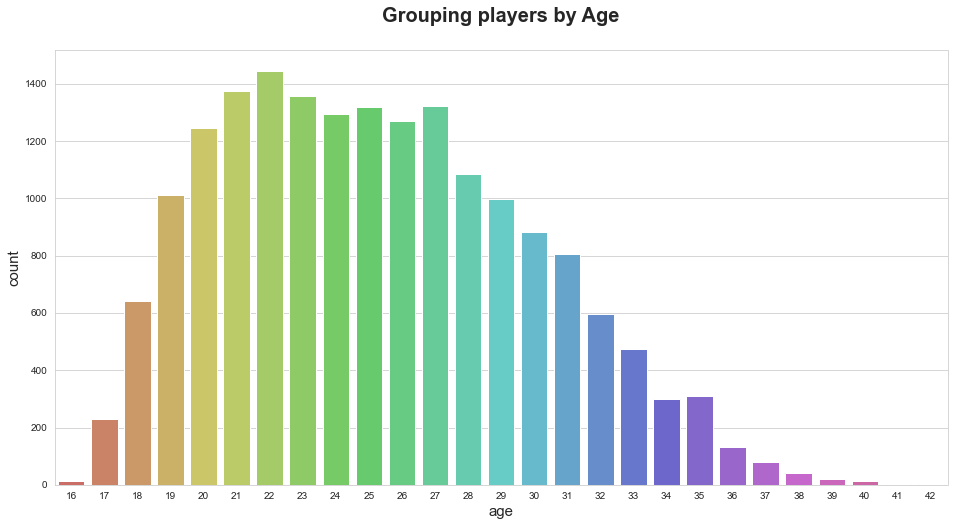

In [27]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="age", data=dataset, palette="hls");
plt.show()

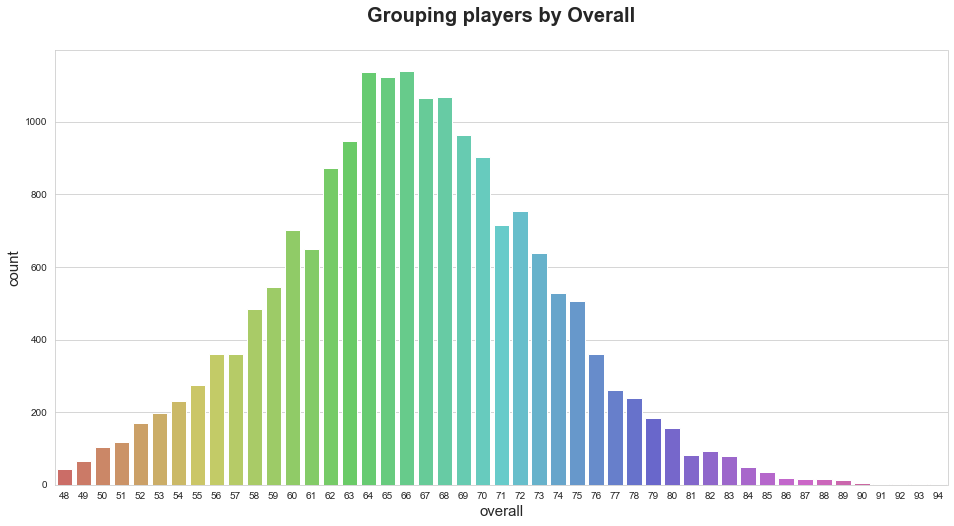

In [28]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="overall", data=dataset, palette="hls");
plt.show()

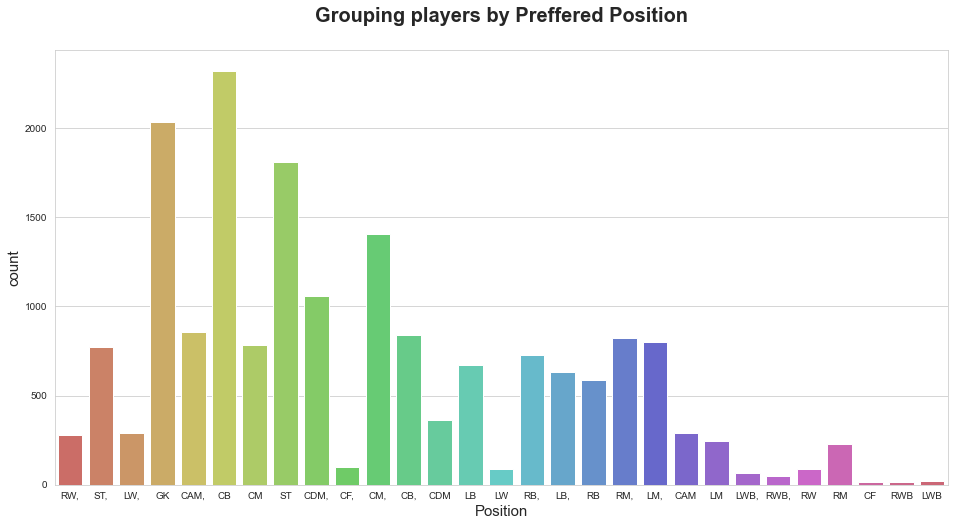

In [29]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preffered Position', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Position", data=dataset, palette="hls");
plt.show()

In [ ]:
player_position_value = dataset.groupby("Position").mean().reset_index()[["Position", "ValueNum"]]
player_position_value = player_position_value.sort_values(["ValueNum"], ascending=False)
player_position_value["ValueNum"] = player_position_value["ValueNum"].apply(lambda x: x/1000000).values.tolist()

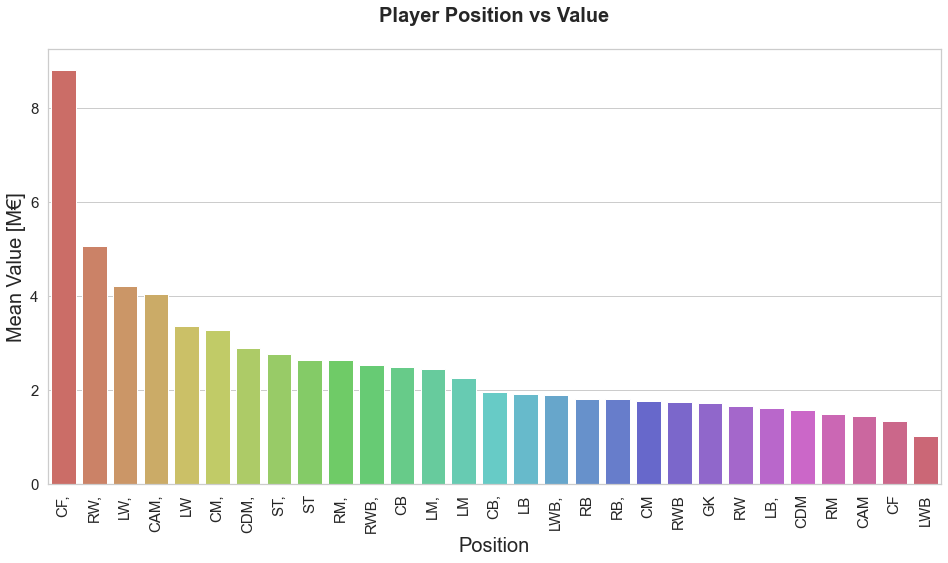

In [36]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Player Position vs Value', fontsize=20, fontweight='bold', y=1.05,)
sns.set(font_scale = 2)
b = sns.barplot(x="Position", y="ValueNum", data=player_position_value, palette="hls")
plt.xticks(rotation=90)
b.tick_params(labelsize=15)
plt.xlabel("Position", fontsize=20)
plt.ylabel('Mean Value [M€]', fontsize=20)
plt.show()